# Flight Delays Project

## 1. Introduction

This project focuses on predicting flight delays using machine learning. The study is based on real flight and weather data from JFK Airport (2024). The objective was to build a classification model that can predict delays based on weather and schedule data.

## 2. Data Loading and Initial Exploration

### 2.1 Import Libraries

In [63]:
import pandas as pd
import numpy as np
from datetime import datetime


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

### 2.2 Load Flight Delay Dataset

In [64]:
df = pd.read_csv('./flight_data_2018_2024.csv', low_memory=False)

### 2.3 Initial Data Exploration

We explore the structure, data types, and basic statistics of the dataset.

In [65]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582425 entries, 0 to 582424
Columns: 120 entries, Year to Unnamed: 119
dtypes: float64(70), int64(23), object(27)
memory usage: 533.2+ MB


In [67]:
df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 119
count,582425.0,582425.0,582425.0,582425.000000,582425.000000,582425.000000,582425.000000,54.000000,54.000000,582425.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2024.0,1.0,1.0,15.896579,3.803769,19821.876449,2501.993012,20122.537037,5992.277778,19963.143560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.953474,2.012399,281.956020,1684.833888,138.200116,426.557719,376.972882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2024.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,20046.000000,3956.000000,19393.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024.0,1.0,1.0,8.000000,2.000000,19790.000000,1146.000000,20046.000000,6059.750000,19790.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024.0,1.0,1.0,16.000000,4.000000,19805.000000,2166.000000,20046.000000,6094.000000,19930.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024.0,1.0,1.0,24.000000,6.000000,19977.000000,3704.000000,20046.000000,6140.750000,20368.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.0,1.0,1.0,31.000000,7.000000,20436.000000,9685.000000,20398.000000,6313.000000,20500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We define a function to display the dataset in chunks for easier review.

In [68]:
def display_dataframe_chunks(df, chunk_size):
    """
    Parameters:
    df (pd.DataFrame): The DataFrame to display.
    chunk_size (int): Number of columns to display per chunk.
    """
    columns = df.columns.tolist()

    # Loop through column chunks
    for i in range(0, len(columns), chunk_size):
        subset_columns = columns[i:i+chunk_size]
        df_subset = df[subset_columns]
        print(f"\n===== Displaying Columns {i+1} to {i+len(subset_columns)} =====\n")

        # Display the first few rows of the subset
        with pd.option_context('display.max_columns', None, 'display.width', 1000):
            print(df_subset.head())

In [69]:
display_dataframe_chunks(df,20)


===== Displaying Columns 1 to 20 =====

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Originally_Scheduled_Code_Share_Airline  DOT_ID_Originally_Scheduled_Code_Share_Airline IATA_Code_Originally_Scheduled_Code_Share_Airline  Flight_Num_Originally_Scheduled_Code_Share_Airline Operating_Airline   DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline
0  2024        1      1          14          7  2024-01-14                        UA                            UA_CODESHARE                     19977                          UA                             4432                                     NaN                                             NaN                                               NaN                                                NaN                  G7                   

## 3. Data Cleaning

### 3.1 Remove Unnecessary and Empty Columns

Check the columns with 100% NaN.

In [70]:
nan_counts = df.isna().sum()
fully_nan_columns = nan_counts[nan_counts == len(df)].index.tolist()

print("\n===== Columns That Are 100% NaN =====\n")
for col in fully_nan_columns:
    print(col)

print(f"\nTotal columns that are fully NaN: {len(fully_nan_columns)}")


===== Columns That Are 100% NaN =====

Div4Airport
Div4AirportID
Div4AirportSeqID
Div4WheelsOn
Div4TotalGTime
Div4LongestGTime
Div4WheelsOff
Div4TailNum
Div5Airport
Div5AirportID
Div5AirportSeqID
Div5WheelsOn
Div5TotalGTime
Div5LongestGTime
Div5WheelsOff
Div5TailNum
Unnamed: 119

Total columns that are fully NaN: 17


We remove columns with 100% missing values and other irrelevant columns that are not useful.

In [71]:

columns_to_drop = [
    # 100% NaN columns
    "Div4Airport", "Div4AirportID", "Div4AirportSeqID", "Div4WheelsOn", "Div4TotalGTime",
    "Div4LongestGTime", "Div4WheelsOff", "Div4TailNum", "Div5Airport", "Div5AirportID",
    "Div5AirportSeqID", "Div5WheelsOn", "Div5TotalGTime", "Div5LongestGTime", "Div5WheelsOff",
    "Div5TailNum", "Unnamed: 119",

    # Arrival information
    "CRSArrTime", "ArrTime", "ArrDelay", "ArrDelayMinutes", "ArrDel15", "ArrivalDelayGroups", "ArrTimeBlk",

    # Cancellation and diversion
    "Cancelled", "CancellationCode", "Diverted", "DivAirportLandings", "DivReachedDest",
    "DivActualElapsedTime", "DivArrDelay", "DivDistance",

    # Unnecessary identifiers and redundant codes
    "DOT_ID_Marketing_Airline", "IATA_Code_Marketing_Airline",
    "DOT_ID_Originally_Scheduled_Code_Share_Airline", "IATA_Code_Originally_Scheduled_Code_Share_Airline",
    "DOT_ID_Operating_Airline", "IATA_Code_Operating_Airline",
    "Flight_Num_Originally_Scheduled_Code_Share_Airline", "Originally_Scheduled_Code_Share_Airline",
    "Flight_Number_Marketing_Airline", "Flight_Number_Operating_Airline",
    "Tail_Number",

    # Diverted flight details
    "Div1Airport", "Div1AirportID", "Div1AirportSeqID", "Div1WheelsOn", "Div1TotalGTime", "Div1LongestGTime",
    "Div1WheelsOff", "Div1TailNum", "Div2Airport", "Div2AirportID", "Div2AirportSeqID", "Div2WheelsOn",
    "Div2TotalGTime", "Div2LongestGTime", "Div2WheelsOff", "Div2TailNum", "Div3Airport", "Div3AirportID",
    "Div3AirportSeqID", "Div3WheelsOn", "Div3TotalGTime", "Div3LongestGTime", "Div3WheelsOff", "Div3TailNum",

    # Duplicate flight metadata
    "Duplicate", "Flights", "FirstDepTime", "TotalAddGTime", "LongestAddGTime"
]


df_cleaned = df.drop(columns=columns_to_drop)

print("Dropped columns:")
for col in columns_to_drop:
    print(col)

print(f"\nTotal columns dropped: {len(columns_to_drop)}")
print(f"Original dataset columns: {df.shape[1]}")
print(f"Remaining columns after cleaning: {df_cleaned.shape[1]}")

Dropped columns:
Div4Airport
Div4AirportID
Div4AirportSeqID
Div4WheelsOn
Div4TotalGTime
Div4LongestGTime
Div4WheelsOff
Div4TailNum
Div5Airport
Div5AirportID
Div5AirportSeqID
Div5WheelsOn
Div5TotalGTime
Div5LongestGTime
Div5WheelsOff
Div5TailNum
Unnamed: 119
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
DOT_ID_Marketing_Airline
IATA_Code_Marketing_Airline
DOT_ID_Originally_Scheduled_Code_Share_Airline
IATA_Code_Originally_Scheduled_Code_Share_Airline
DOT_ID_Operating_Airline
IATA_Code_Operating_Airline
Flight_Num_Originally_Scheduled_Code_Share_Airline
Originally_Scheduled_Code_Share_Airline
Flight_Number_Marketing_Airline
Flight_Number_Operating_Airline
Tail_Number
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime
Div1LongestGTime
Div1WheelsOff
Div1TailNum
Div2Airport
Div2AirportID
Div2AirportSeqID
Div2WheelsOn
Div2

Display the dataset after the first drop.

In [72]:
display_dataframe_chunks(df_cleaned, 16)


===== Displaying Columns 1 to 16 =====

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners Operating_Airline   OriginAirportID  OriginAirportSeqID  OriginCityMarketID Origin  OriginCityName OriginState  OriginStateFips
0  2024        1      1          14          7  2024-01-14                        UA                            UA_CODESHARE                 G7            13296             1329605               30721    MHT  Manchester, NH          NH               33
1  2024        1      1          14          7  2024-01-14                        UA                            UA_CODESHARE                 G7            12264             1226402               30852    IAD  Washington, DC          VA               51
2  2024        1      1          14          7  2024-01-14                        UA                            UA_CODESHARE                 G7            11618             1161802               31703

Dropping more uncessary columns.

In [73]:
columns_to_remove = [
    # Date redundancy
    "Year", "Quarter", "Month", "DayofMonth", "DayOfWeek",
    
    # Destination airport details
    "DestAirportID", "DestAirportSeqID", "DestCityMarketID", "Dest", "DestState",
    "DestStateFips", "DestStateName", "DestWac", "DestCityName",

    # Unnecessary departure timing columns
    "WheelsOff", "WheelsOn", "TaxiOut", "TaxiIn"
]

df_cleaned = df_cleaned.drop(columns=columns_to_remove)

print("Dropped columns:")
for col in columns_to_remove:
    print(col)

print(f"\nTotal columns dropped: {len(columns_to_remove)}")
print(f"Remaining columns after cleaning: {df_cleaned.shape[1]}")

Dropped columns:
Year
Quarter
Month
DayofMonth
DayOfWeek
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestState
DestStateFips
DestStateName
DestWac
DestCityName
WheelsOff
WheelsOn
TaxiOut
TaxiIn

Total columns dropped: 18
Remaining columns after cleaning: 30


In [74]:
display_dataframe_chunks(df_cleaned, 10)


===== Displaying Columns 1 to 10 =====

   FlightDate Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners Operating_Airline   OriginAirportID  OriginAirportSeqID  OriginCityMarketID Origin  OriginCityName OriginState
0  2024-01-14                        UA                            UA_CODESHARE                 G7            13296             1329605               30721    MHT  Manchester, NH          NH
1  2024-01-14                        UA                            UA_CODESHARE                 G7            12264             1226402               30852    IAD  Washington, DC          VA
2  2024-01-14                        UA                            UA_CODESHARE                 G7            11618             1161802               31703    EWR      Newark, NJ          NJ
3  2024-01-14                        UA                            UA_CODESHARE                 G7            15016             1501606               31123    STL   St. Louis, MO          MO
4  2

We check the list of unique origin city names in the dataset.

In [75]:
print(df_cleaned["OriginCityName"].unique())

['Manchester, NH' 'Washington, DC' 'Newark, NJ' 'St. Louis, MO'
 'Richmond, VA' 'Presque Isle/Houlton, ME' 'Chicago, IL' 'Lincoln, NE'
 'State College, PA' 'Ithaca/Cortland, NY' 'Harrisburg, PA' 'Houston, TX'
 'Casper, WY' 'Hobbs, NM' 'Knoxville, TN' 'Cody, WY' 'Lubbock, TX'
 'Springfield, MO' 'Denver, CO' 'Lafayette, LA' 'Mobile, AL'
 'Brownsville, TX' 'Huntsville, AL' 'Mission/McAllen/Edinburg, TX'
 'Jackson/Vicksburg, MS' 'Little Rock, AR' 'Charlottesville, VA'
 'Amarillo, TX' 'Pensacola, FL' 'Tulsa, OK' 'Lake Charles, LA'
 'Providence, RI' 'Roanoke, VA' 'Durango, CO' 'Santa Fe, NM'
 'Birmingham, AL' 'Corpus Christi, TX' 'Midland/Odessa, TX'
 'Panama City, FL' 'Gulfport/Biloxi, MS' 'Wichita, KS' 'Columbia, SC'
 'Albany, NY' 'Dayton, OH' 'Philadelphia, PA' 'Madison, WI' 'Buffalo, NY'
 'Asheville, NC' 'Charlotte, NC' 'Detroit, MI' 'Scranton/Wilkes-Barre, PA'
 'Fayetteville, AR' 'Omaha, NE' 'El Paso, TX' 'Oklahoma City, OK'
 'Dallas/Fort Worth, TX' 'Sarasota/Bradenton, FL' 'Louisville,

In [76]:
display_dataframe_chunks(df_cleaned, 16)


===== Displaying Columns 1 to 16 =====

   FlightDate Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners Operating_Airline   OriginAirportID  OriginAirportSeqID  OriginCityMarketID Origin  OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  CRSDepTime  DepTime  DepDelay
0  2024-01-14                        UA                            UA_CODESHARE                 G7            13296             1329605               30721    MHT  Manchester, NH          NH               33   New Hampshire         14        1738   1849.0      71.0
1  2024-01-14                        UA                            UA_CODESHARE                 G7            12264             1226402               30852    IAD  Washington, DC          VA               51        Virginia         38         815    814.0      -1.0
2  2024-01-14                        UA                            UA_CODESHARE                 G7            11618             1161802               31703    EW

Display the columns left in the dataset.

In [77]:
for a in df_cleaned.columns :
    print(a)

FlightDate
Marketing_Airline_Network
Operated_or_Branded_Code_Share_Partners
Operating_Airline 
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
CRSElapsedTime
ActualElapsedTime
AirTime
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


Dropping additional redundant columns

In [78]:
df_cleaned.columns = df_cleaned.columns.str.strip()

columns_to_remove = [
    "Marketing_Airline_Network",
    "Operated_or_Branded_Code_Share_Partners",
    "Operating_Airline",
    "OriginAirportID",
    "OriginAirportSeqID",
    "OriginCityMarketID",
    "OriginCityName",
    "OriginState",
    "OriginStateName",
    "OriginWac",
    "Distance",
    "DistanceGroup",
    "OriginStateFips",
    "DepTimeBlk",
    "CRSElapsedTime",
    "ActualElapsedTime",
    "AirTime",
    "SecurityDelay",
    "DepDelayMinutes",           
    "DepartureDelayGroups"
]

df_cleaned = df_cleaned.drop(columns=columns_to_remove)

print("Dropped columns:")
for col in columns_to_remove:
    print(f"- {col}")

print(f"\nTotal columns dropped: {len(columns_to_remove)}")
print(f"Remaining columns: {df_cleaned.shape[1]}")

Dropped columns:
- Marketing_Airline_Network
- Operated_or_Branded_Code_Share_Partners
- Operating_Airline
- OriginAirportID
- OriginAirportSeqID
- OriginCityMarketID
- OriginCityName
- OriginState
- OriginStateName
- OriginWac
- Distance
- DistanceGroup
- OriginStateFips
- DepTimeBlk
- CRSElapsedTime
- ActualElapsedTime
- AirTime
- SecurityDelay
- DepDelayMinutes
- DepartureDelayGroups

Total columns dropped: 20
Remaining columns: 10


Display the columns remaining in the dataset.

In [79]:
for a in df_cleaned.columns :
    print(a)

FlightDate
Origin
CRSDepTime
DepTime
DepDelay
DepDel15
CarrierDelay
WeatherDelay
NASDelay
LateAircraftDelay


In [80]:
display_dataframe_chunks(df_cleaned, 10)


===== Displaying Columns 1 to 10 =====

   FlightDate Origin  CRSDepTime  DepTime  DepDelay  DepDel15  CarrierDelay  WeatherDelay  NASDelay  LateAircraftDelay
0  2024-01-14    MHT        1738   1849.0      71.0       1.0           0.0           0.0       0.0               45.0
1  2024-01-14    IAD         815    814.0      -1.0       0.0           0.0           0.0      26.0                0.0
2  2024-01-14    EWR        1540   1654.0      74.0       1.0           0.0          74.0      12.0                0.0
3  2024-01-14    STL         630    630.0       0.0       0.0           0.0           0.0      25.0                0.0
4  2024-01-14    STL        1300   1333.0      33.0       1.0          18.0           0.0       0.0                0.0


Filter the dataset to keep only flights departing from JFK.

In [81]:
df_jfk = df_cleaned[df_cleaned["Origin"] == "JFK"].copy()

print(f"Rows with JFK as origin: {df_jfk.shape[0]}")

Rows with JFK as origin: 9471


Drop the Origin column since it now contains the same value and display the number of remaining columns.

In [82]:
df_jfk = df_jfk.drop(columns=["Origin"])

print(f"Remaining columns: {df_jfk.shape[1]}")

Remaining columns: 9


In [83]:
display_dataframe_chunks(df_jfk, 10)


===== Displaying Columns 1 to 9 =====

        FlightDate  CRSDepTime  DepTime  DepDelay  DepDel15  CarrierDelay  WeatherDelay  NASDelay  LateAircraftDelay
123042  2024-01-08        2159   2153.0      -6.0       0.0           NaN           NaN       NaN                NaN
123043  2024-01-09        2159      NaN       NaN       NaN           NaN           NaN       NaN                NaN
123044  2024-01-10        2159   2149.0     -10.0       0.0           NaN           NaN       NaN                NaN
123045  2024-01-11        2159   2149.0     -10.0       0.0           NaN           NaN       NaN                NaN
123046  2024-01-12        2159   2147.0     -12.0       0.0           NaN           NaN       NaN                NaN


In [84]:
df_jfk.shape

(9471, 9)

Checking how many rows has null in the `DepTime` column

In [85]:
missing_deptime_count = df_jfk['DepTime'].isna().sum()
print(f"Rows with missing DepTime: {missing_deptime_count}")

Rows with missing DepTime: 270


Function to create a summary of missing values and their percentage, sorted in descending order.


In [86]:
def generate_null_report(df):
    total_rows = len(df)
    null_report = (
        df.isna().sum()
        .to_frame(name='MissingCount')
        .assign(MissingPercent=lambda x: (x['MissingCount'] / total_rows * 100).round(2))
        .sort_values(by='MissingPercent', ascending=False)
    )
    return null_report

In [87]:
null_report = generate_null_report(df_jfk)
print(null_report)

                   MissingCount  MissingPercent
LateAircraftDelay          7329           77.38
WeatherDelay               7329           77.38
NASDelay                   7329           77.38
CarrierDelay               7329           77.38
DepDelay                    270            2.85
DepTime                     270            2.85
DepDel15                    270            2.85
FlightDate                    0            0.00
CRSDepTime                    0            0.00


Dropping the columsn with a lot of missing values. They cannot be used if the main information is missing.

In [88]:
columns_to_drop_due_to_nan = [
    'LateAircraftDelay',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay'
]

df_jfk = df_jfk.drop(columns=columns_to_drop_due_to_nan)

print("Dropped columns:")
for col in columns_to_drop_due_to_nan:
    print(f"- {col}")

print(f"\nRemaining columns: {df_jfk.shape[1]}")


Dropped columns:
- LateAircraftDelay
- CarrierDelay
- WeatherDelay
- NASDelay

Remaining columns: 5


In [89]:
display_dataframe_chunks(df_jfk, 10)


===== Displaying Columns 1 to 5 =====

        FlightDate  CRSDepTime  DepTime  DepDelay  DepDel15
123042  2024-01-08        2159   2153.0      -6.0       0.0
123043  2024-01-09        2159      NaN       NaN       NaN
123044  2024-01-10        2159   2149.0     -10.0       0.0
123045  2024-01-11        2159   2149.0     -10.0       0.0
123046  2024-01-12        2159   2147.0     -12.0       0.0


Check the missing values for the remaining columns.

In [90]:
null_report = generate_null_report(df_jfk)
print(null_report)

            MissingCount  MissingPercent
DepTime              270            2.85
DepDel15             270            2.85
DepDelay             270            2.85
FlightDate             0            0.00
CRSDepTime             0            0.00


In [91]:
df_jfk = df_jfk.dropna()

print(f"Dataset shape: {df_jfk.shape}")

Dataset shape: (9201, 5)


Convert departure time and flight date into a datetime column for merging with the weather data.

In [92]:
def format_deptime(deptime):
    """
    Convert an integer HHMM time to 'HH:00:00' format. Returns None if invalid.
    """
    try:
        time_str = f"{int(deptime):04}"
        hour = int(time_str[:2])
        return f"{hour:02}:00:00"
    except:
        return None


df_jfk['DepHour'] = df_jfk['DepTime'].apply(format_deptime)

df_jfk['datetime'] = df_jfk['FlightDate'] + ' ' + df_jfk['DepHour']

# Convert to datetime object for merge
df_jfk['datetime'] = pd.to_datetime(df_jfk['datetime'], errors='coerce')

print(df_jfk[['FlightDate', 'DepTime', 'datetime']].head())

        FlightDate  DepTime            datetime
123042  2024-01-08   2153.0 2024-01-08 21:00:00
123044  2024-01-10   2149.0 2024-01-10 21:00:00
123045  2024-01-11   2149.0 2024-01-11 21:00:00
123046  2024-01-12   2147.0 2024-01-12 21:00:00
123047  2024-01-13   2157.0 2024-01-13 21:00:00


In [93]:
df_jfk

,FlightDate,CRSDepTime,DepTime,DepDelay,DepDel15,DepHour,datetime
123042,2024-01-08,2159,2153.0,-6.0,0.0,21:00:00,2024-01-08 21:00:00
123044,2024-01-10,2159,2149.0,-10.0,0.0,21:00:00,2024-01-10 21:00:00
123045,2024-01-11,2159,2149.0,-10.0,0.0,21:00:00,2024-01-11 21:00:00
123046,2024-01-12,2159,2147.0,-12.0,0.0,21:00:00,2024-01-12 21:00:00
123047,2024-01-13,2200,2157.0,-3.0,0.0,21:00:00,2024-01-13 21:00:00
...,...,...,...,...,...,...,...
582403,2024-01-25,1314,1318.0,4.0,0.0,13:00:00,2024-01-25 13:00:00
582404,2024-01-25,1559,1556.0,-3.0,0.0,15:00:00,2024-01-25 15:00:00
582411,2024-01-25,2130,2126.0,-4.0,0.0,21:00:00,2024-01-25 21:00:00
582412,2024-01-25,905,903.0,-2.0,0.0,09:00:00,2024-01-25 09:00:00


Check which years are available in the dataset.

In [94]:
df_jfk['FlightDate'] = pd.to_datetime(df_jfk['FlightDate'], errors='coerce')

years = sorted(int(year) for year in df_jfk['FlightDate'].dt.year.dropna().unique())

print(f"Years in df_jfk: {years}")

Years in df_jfk: [2024]


### 3.2 Merge Datasets

Load the weather dataset and merge it with the flight dataset using the datetime column.

In [95]:
df_weather = pd.read_csv('./full_weather_dataset.csv', parse_dates=['datetime'])

In [96]:
df_merged_final = pd.merge(df_jfk, df_weather, on='datetime', how='inner')

print(f"Merged dataset shape: {df_merged_final.shape}")
df_merged_final.head()

Merged dataset shape: (9200, 18)


,FlightDate,CRSDepTime,DepTime,DepDelay,DepDel15,DepHour,datetime,snow,winddir,visibility,windspeed,windgust,cloudcover,uvindex,solarradiation,solarenergy,humidity,precip
0,2024-01-08,2159,2153.0,-6.0,0.0,21:00:00,2024-01-08 21:00:00,0.0,100.0,16.0,4.8,13.7,24.0,0,0.0,0.0,61.57,0.0
1,2024-01-10,2159,2149.0,-10.0,0.0,21:00:00,2024-01-10 21:00:00,0.0,264.0,16.0,33.7,50.3,90.0,0,0.0,0.0,49.08,0.0
2,2024-01-11,2159,2149.0,-10.0,0.0,21:00:00,2024-01-11 21:00:00,0.0,222.0,16.0,19.5,28.4,97.8,0,0.0,0.0,61.53,0.0
3,2024-01-12,2159,2147.0,-12.0,0.0,21:00:00,2024-01-12 21:00:00,0.0,97.0,16.0,30.9,47.1,97.5,0,0.0,0.0,75.56,0.0
4,2024-01-13,2200,2157.0,-3.0,0.0,21:00:00,2024-01-13 21:00:00,0.0,270.0,16.0,47.0,66.3,90.0,0,0.0,0.0,44.51,0.0


Display all the columsn of the merged dataset.

In [97]:
df_merged_final.columns

Index(['FlightDate', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDel15',
       'DepHour', 'datetime', 'snow', 'winddir', 'visibility', 'windspeed',
       'windgust', 'cloudcover', 'uvindex', 'solarradiation', 'solarenergy',
       'humidity', 'precip'],
      dtype='object')

Check all the years available in the merged dataset.

In [98]:
# First, make sure FlightDate is in datetime format
df_merged_final['FlightDate'] = pd.to_datetime(df_merged_final['FlightDate'], errors='coerce')

years = df_merged_final['FlightDate'].dt.year.dropna()
years = sorted(set(map(int, years)))

print(f"Years available in the dataset: {years}")

Years available in the dataset: [2024]


In [99]:
df_merged_final.columns

Index(['FlightDate', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDel15',
       'DepHour', 'datetime', 'snow', 'winddir', 'visibility', 'windspeed',
       'windgust', 'cloudcover', 'uvindex', 'solarradiation', 'solarenergy',
       'humidity', 'precip'],
      dtype='object')

Save the merged dataset as a checkpoint for further analysis.

In [100]:
df_merged_final.to_csv('merged_flight_weather_dataset.csv', index=False)

print("Merged dataset saved.")

Merged dataset saved.


## 4. Exploratory Data Analysis 

We analyze the correlation between basic weather features and the target variable `DepDel15`.

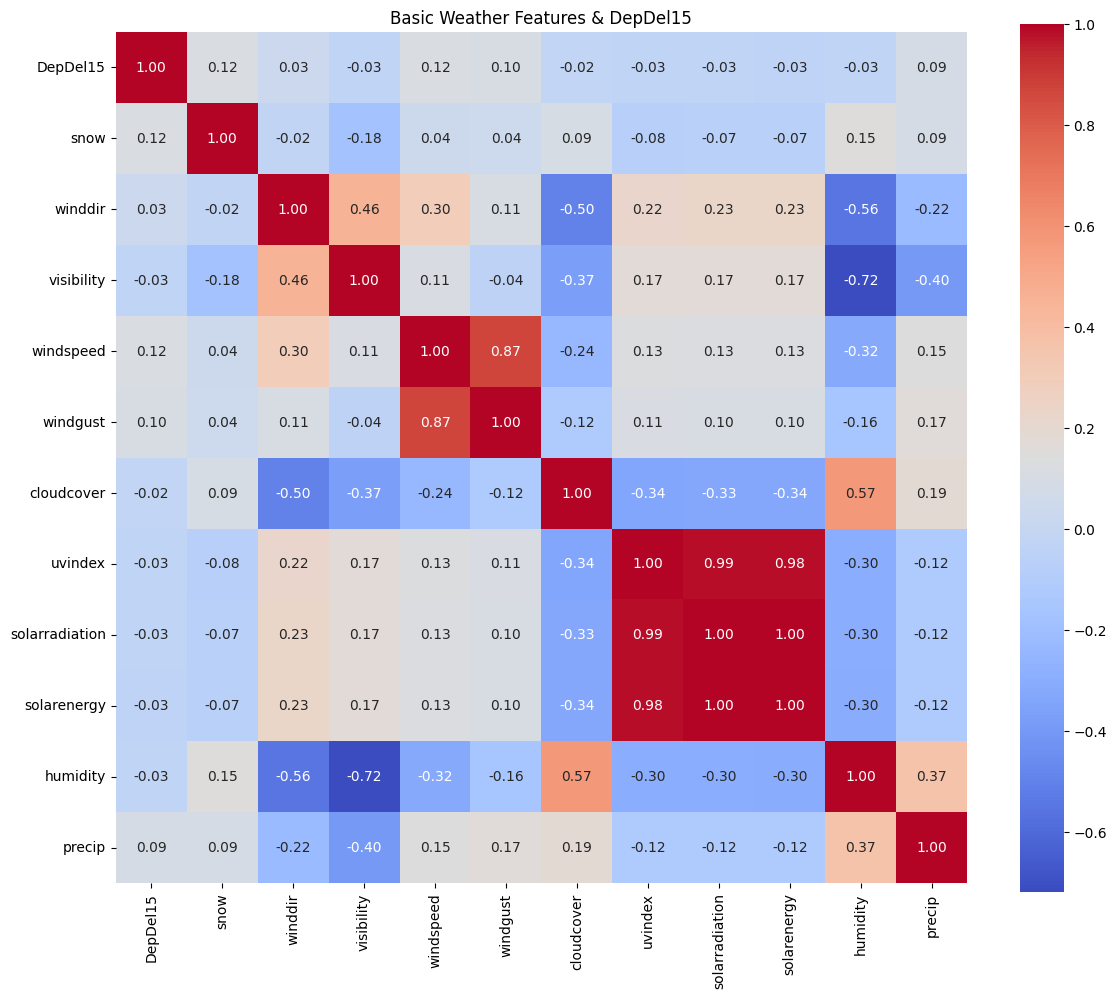

In [101]:
df = pd.read_csv("merged_flight_weather_dataset.csv")

# Basic weather columns + target (DepDel15)
weather_columns = [
    'DepDel15',  
    'snow', 'winddir', 'visibility', 'windspeed', 'windgust',
    'cloudcover', 'uvindex', 'solarradiation', 'solarenergy',
    'humidity', 'precip'
]


df_subset = df[weather_columns].dropna()

corr_matrix = df_subset.corr()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Basic Weather Features & DepDel15")
plt.tight_layout()
plt.show()

## 5. Feature Engineering

### 5.1 Feature Attempts

These features were created to explore additional weather interactions, but were not kept in the final model due to low correlation.

Test Feature Correlations with DepDel15:
wind_snow_impact           0.114040
weather_delay              0.113175
storm_hazard_index         0.111737
wind_precipitation         0.107655
storm_factor               0.106659
gust_pressure              0.103657
visibility_suppression     0.092119
night_rainfall_pressure    0.072145
storm_visibility           0.071538
radiation_block            0.055731
wind_burst                 0.054587
Name: DepDel15, dtype: float64


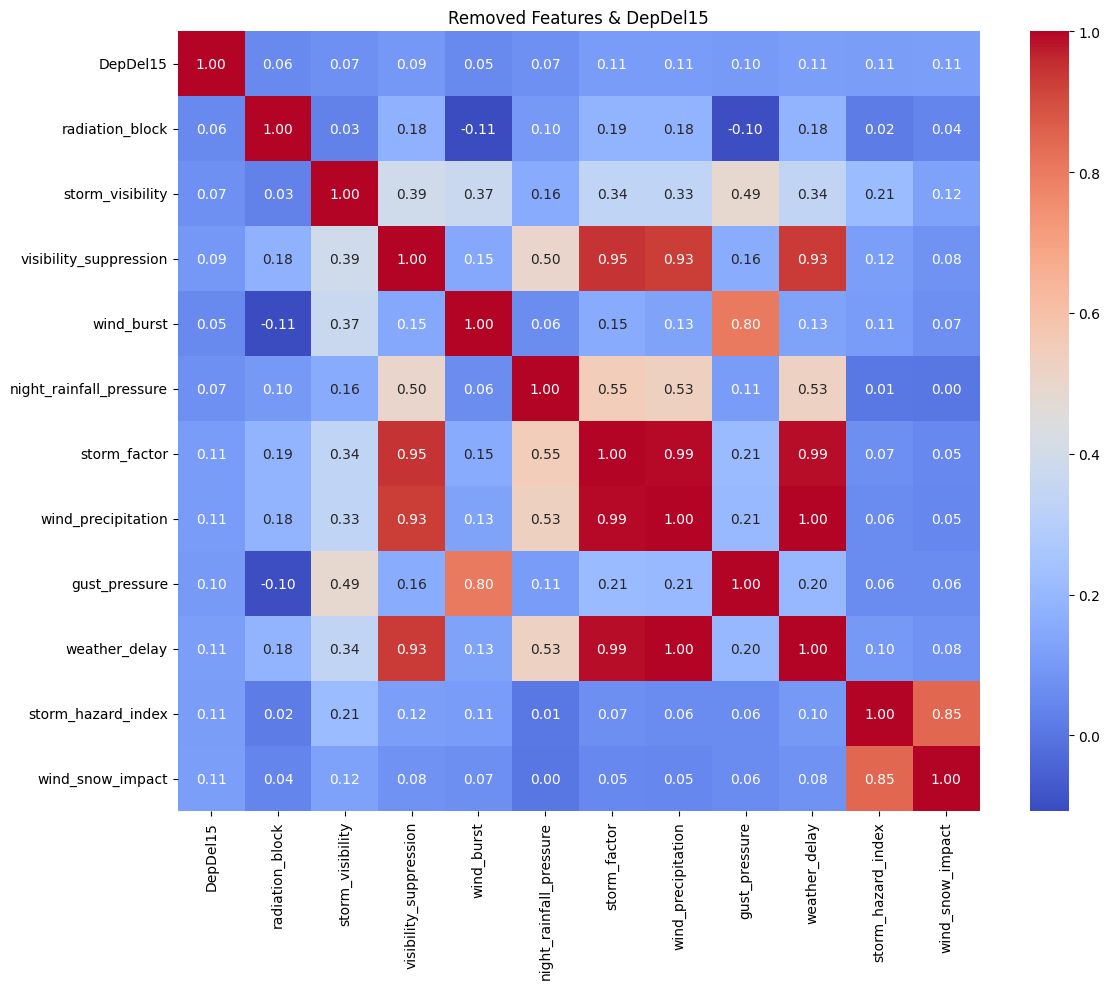

In [102]:
df_features_test = df.copy()

# Extract hour from datetime
df_features_test['datetime'] = pd.to_datetime(df_features_test['datetime'], errors='coerce')
df_features_test['hour'] = df_features_test['datetime'].dt.hour

# Engineered features
df_features_test['radiation_block'] = (df_features_test['cloudcover'] + df_features_test['humidity']) / (df_features_test['solarradiation'] + 1)
df_features_test['storm_visibility'] = df_features_test['windspeed'] / (df_features_test['visibility'] + 1)
df_features_test['visibility_suppression'] = df_features_test['precip'] / (df_features_test['visibility'] + 1)
df_features_test['wind_burst'] = df_features_test['windgust'] - df_features_test['windspeed']
df_features_test['night_rainfall_pressure'] = df_features_test['precip'] * df_features_test['hour'].apply(lambda x: 1 if x >= 22 or x <= 5 else 0)
df_features_test['storm_factor'] = df_features_test['cloudcover'] * df_features_test['windgust'] * df_features_test['precip']
df_features_test['wind_precipitation'] = df_features_test['windspeed'] * df_features_test['precip']
df_features_test['gust_pressure'] = df_features_test['windgust'] ** 2
df_features_test['weather_delay'] = df_features_test['windspeed'] * df_features_test['precip'] * (df_features_test['snow'] + 1)
df_features_test['storm_hazard_index'] = df_features_test['snow'] * df_features_test['windgust'] / (df_features_test['visibility'] + 1)
df_features_test['wind_snow_impact'] = df_features_test['windgust'] * df_features_test['snow']



# List of test features + target ('DepDel15')
test_features_corr = [
    'DepDel15', 
    'radiation_block',
    'storm_visibility',
    'visibility_suppression',
    'wind_burst',
    'night_rainfall_pressure',
    'storm_factor',
    'wind_precipitation',
    'gust_pressure',
    'weather_delay',
    'storm_hazard_index',
    'wind_snow_impact'
]


df_features_test[test_features_corr] = df_features_test[test_features_corr].fillna(0)

correlation_matrix_test = df_features_test[test_features_corr].corr()
sorted_corr_test = correlation_matrix_test['DepDel15'].drop('DepDel15').sort_values(key=abs, ascending=False)


print("Test Feature Correlations with DepDel15:")
print(sorted_corr_test)

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Removed Features & DepDel15")
plt.tight_layout()
plt.show()

### 5.2 Feature Selection

We create new engineered features to capture correlations between weather conditions and flight delays.

Final Feature Correlations with DepDel15:
hourly_delay_shift        0.348978
windspeed_hour_product    0.208741
gust_hour_product         0.202078
late_heavy_gust           0.172440
operational_risk_score    0.120749
cold_stress_combo         0.119954
snowstorm_momentum        0.118563
Name: DepDel15, dtype: float64


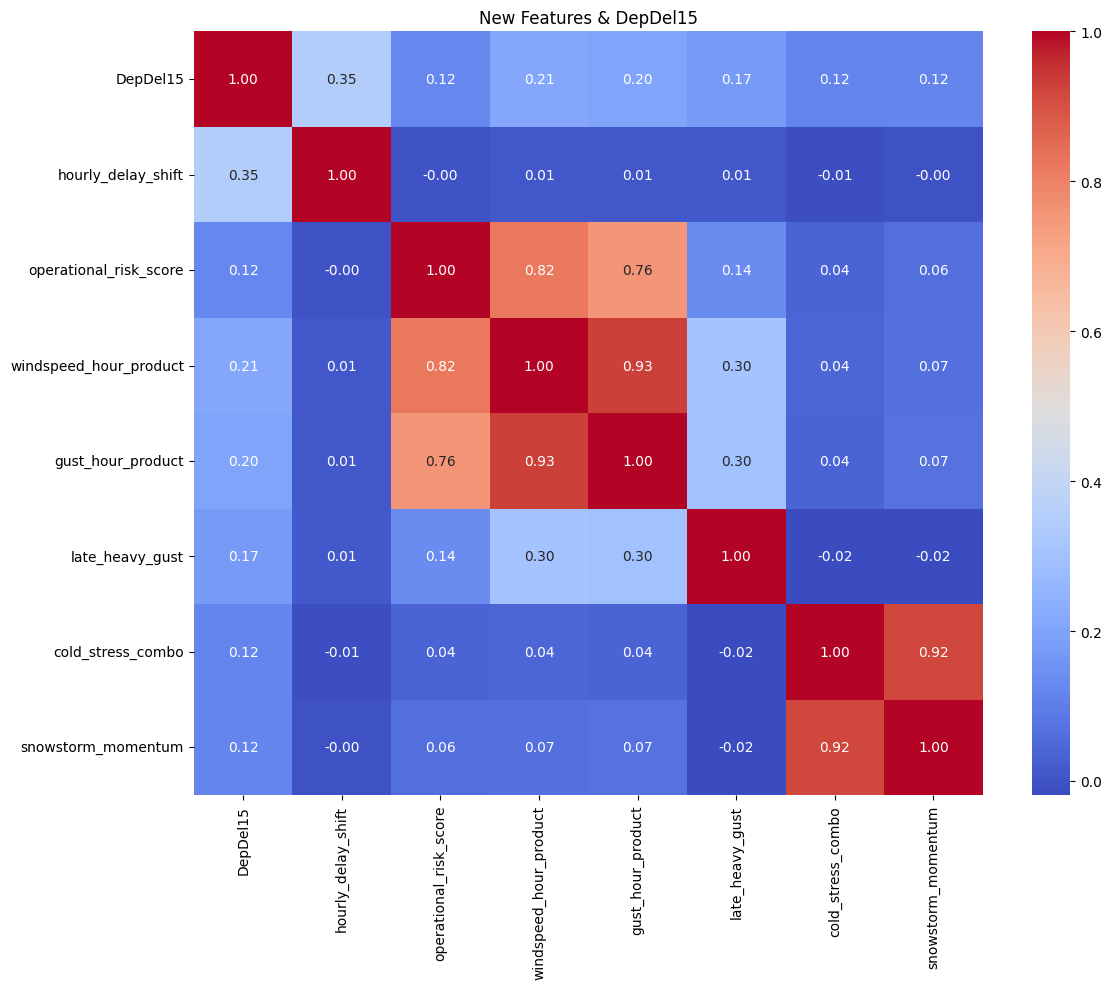

In [103]:
df = pd.read_csv("merged_flight_weather_dataset.csv")

# Convert and extract time features
df['datetime'] = pd.to_datetime(df['datetime'])
df['day'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df = df.sort_values(by='datetime')

# Engineered features

# Delay shift during the day
df['hourly_delay_shift'] = df.groupby('day')['DepDelay'].diff().fillna(0)

# Combined windspeed and precipitation
df['operational_risk_score'] = 0.6 * df['windspeed'] + 0.4 * df['precip']

# Windspeed × hour
df['windspeed_hour_product'] = df['windspeed'] * df['hour']

# Gust × hour
df['gust_hour_product'] = df['windgust'] * df['hour']

# Gust during late-night hours (>= 22h)
df['late_heavy_gust'] = df['windgust'] * df['hour'].apply(lambda x: 1 if x >= 22 else 0)

# UV + snow + humidity
df['cold_stress_combo'] = (100 - df['uvindex']) * df['snow'] * df['humidity']

# Snow × gust × humidity
df['snowstorm_momentum'] = df['windgust'] * df['snow'] * (df['humidity'] / 100)


# Selected features + target ('DepDel15')
selected_features = [
    'DepDel15',        
    'hourly_delay_shift',
    'operational_risk_score',
    'windspeed_hour_product',
    'gust_hour_product',
    'late_heavy_gust',
    'cold_stress_combo',
    'snowstorm_momentum'
]

df[selected_features] = df[selected_features].fillna(0)

correlation_matrix = df[selected_features].corr()
sorted_corr = correlation_matrix['DepDel15'].drop('DepDel15').sort_values(key=abs, ascending=False)

print("Final Feature Correlations with DepDel15:")
print(sorted_corr)

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("New Features & DepDel15")
plt.tight_layout()
plt.show()

## 6. Machine learning models

### 6.1 Baseline

#### 6.1.1 Logistic Regression

We define two feature sets and train a logistic regression model on each to compare their performance.


----- Logistic Regression - Basic Weather Features -----
Accuracy: 0.7864130434782609
F1 Score: 0.06205250596658711
Confusion Matrix:


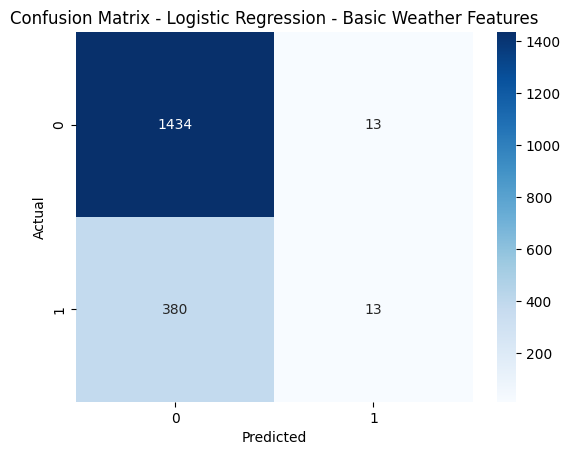


----- Logistic Regression - Engineered Features -----
Accuracy: 0.8826086956521739
F1 Score: 0.6447368421052632
Confusion Matrix:


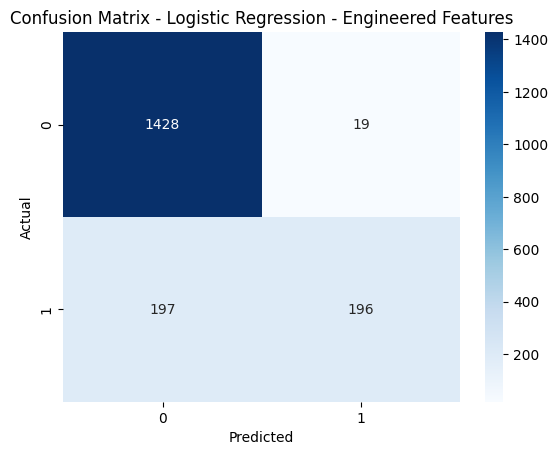

In [107]:
# Target
y = df['DepDel15'].fillna(0).astype(int)

# Basic Weather Columns
weather_columns = [
    'snow', 'winddir', 'visibility', 'windspeed', 'windgust',
    'cloudcover', 'uvindex', 'solarradiation', 'solarenergy',
    'humidity', 'precip'
]

X1 = df[weather_columns].fillna(0)

# Engineered Columns
engineered_columns = [
    'hourly_delay_shift',
    'operational_risk_score',
    'windspeed_hour_product',
    'gust_hour_product',
    'late_heavy_gust',
    'cold_stress_combo',
    'snowstorm_momentum'
]

X2 = df[engineered_columns].fillna(0)

# Function to Train and Evaluate
def train_and_evaluate(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print(f"\n----- {label} -----")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {label}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Run both models
train_and_evaluate(X1, y, "Logistic Regression - Basic Weather Features")
train_and_evaluate(X2, y, "Logistic Regression - Engineered Features")


#### 6.1.2 Random Forest and XGBoost

We train Random Forest and XGBoost on the engineered features and evaluate their performance.


---- RANDOM FOREST ----
Accuracy: 0.9222826086956522
F1 Score: 0.8100929614873837


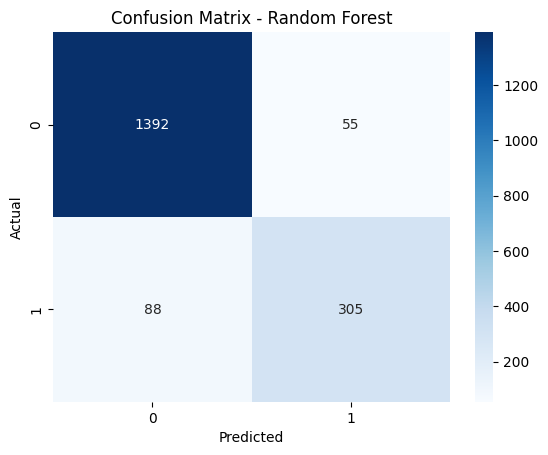

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:22:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



---- XGBOOST ----
Accuracy: 0.9293478260869565
F1 Score: 0.8228882833787466


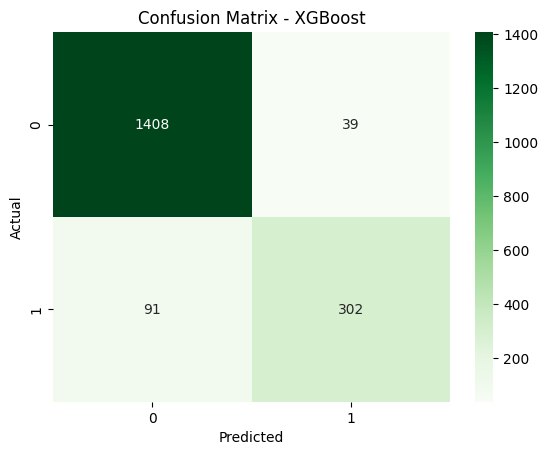

In [108]:
# Choose features
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].fillna(0).astype(int)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Random Forset classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n---- RANDOM FOREST ----")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("\n---- XGBOOST ----")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 6.2 Hyperparameters Tuning

#### 6.2.1 Randomized Search

We search for the best parameters for the Logistic Regression model using RandomizedSearchCV.

In [109]:
# Logistic Regression param space
param_dist_log = {
    'C': np.logspace(-3, 2, 10),
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [200, 500, 1000]
}

log_model = LogisticRegression(random_state=42)
log_search = RandomizedSearchCV(log_model, param_dist_log, n_iter=20, cv=3, scoring='f1', verbose=1, n_jobs=-1, random_state=42)
log_search.fit(X_train, y_train)

best_log = log_search.best_estimator_
y_pred = best_log.predict(X_test)

print("\nLogistic Regression:")
print("Best Parameters:", log_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki


Logistic Regression:
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': np.float64(0.001)}
Accuracy: 0.8853260869565217
F1 Score: 0.6687598116169545
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1447
           1       0.87      0.54      0.67       393

    accuracy                           0.89      1840
   macro avg       0.88      0.76      0.80      1840
weighted avg       0.88      0.89      0.87      1840



We search for the best parameters for the Random Forest model using RandomizedSearchCV.

In [110]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, param_dist_rf, n_iter=30, cv=3, scoring='f1', verbose=1, n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nRandom Forest:")
print("Best Parameters:", rf_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits

Random Forest:
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Accuracy: 0.9342391304347826
F1 Score: 0.8312412831241283
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1447
           1       0.92      0.76      0.83       393

    accuracy                           0.93      1840
   macro avg       0.93      0.87      0.90      1840
weighted avg       0.93      0.93      0.93      1840



We search for the best parameters for the XGBoost model using RandomizedSearchCV.

In [111]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(xgb, param_dist_xgb, n_iter=30, cv=3, scoring='f1', verbose=1, n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nXGBoost:")
print("Best Parameters:", xgb_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:40] WARN


XGBoost:
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.6}
Accuracy: 0.9347826086956522
F1 Score: 0.8314606741573034
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1447
           1       0.93      0.75      0.83       393

    accuracy                           0.93      1840
   macro avg       0.93      0.87      0.90      1840
weighted avg       0.93      0.93      0.93      1840



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 6.2.2 Grid Search

We search for the best parameters for the Random Forest model.

In [112]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Results
cv_results = []

for cv_val in range(2, 11):
    print(f"\n>> Running GridSearch with cv={cv_val}")

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=cv_val,
        scoring='f1',
        verbose=0,
        n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"CV={cv_val} → Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")
    print(f"Best Params: {grid_search.best_params_}")

    cv_results.append({
        'cv': cv_val,
        'accuracy': acc,
        'f1_score': f1,
        'best_params': grid_search.best_params_
    })


cv_results_df = pd.DataFrame(cv_results).sort_values(by='f1_score', ascending=False).reset_index(drop=True)
print("\nCV Results Table (Sorted by F1 Score):")
print(cv_results_df)


>> Running GridSearch with cv=2
CV=2 → Accuracy: 0.9337 | F1 Score: 0.8296
Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}

>> Running GridSearch with cv=3
CV=3 → Accuracy: 0.9359 | F1 Score: 0.8361
Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}

>> Running GridSearch with cv=4
CV=4 → Accuracy: 0.9348 | F1 Score: 0.8324
Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

>> Running GridSearch with cv=5
CV=5 → Accuracy: 0.9337 | F1 Score: 0.8296
Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

>> Running GridSearch with cv=6
CV=6 → Accuracy: 0.9342 | F1 Score: 0.8312
Best Params: {'bootstrap': True, 'max_depth': 20, 

We retrain Random Forest with the best parameters (CV=3) and check the results.

Final Random Forest (CV=3):
Accuracy: 0.9358695652173913
F1 Score: 0.8361111111111111
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1447
           1       0.92      0.77      0.84       393

    accuracy                           0.94      1840
   macro avg       0.93      0.87      0.90      1840
weighted avg       0.94      0.94      0.93      1840



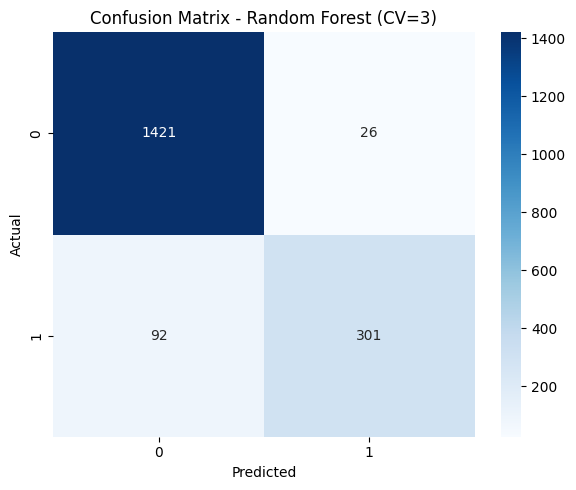

In [113]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest with best params
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

best_rf_model.fit(X_train_scaled, y_train)
y_pred = best_rf_model.predict(X_test_scaled)

# Results
print("Final Random Forest (CV=3):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (CV=3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

We search for the best parameters for the XGBoost model.

In [114]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid for XGBoost
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'use_label_encoder': [False],
    'eval_metric': ['logloss']
}

# Results container
cv_results = []

# CV loop
for cv_val in range(2, 11):
    print(f"\n>> Running GridSearchCV for XGBoost with cv={cv_val}")

    xgb = XGBClassifier(random_state=42)

    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=cv_val,
        scoring='f1',
        verbose=0,
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"CV={cv_val} → Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")
    print(f"Best Params: {grid_search.best_params_}")

    cv_results.append({
        'cv': cv_val,
        'accuracy': acc,
        'f1_score': f1,
        'best_params': grid_search.best_params_
    })


cv_results_df = pd.DataFrame(cv_results).sort_values(by='f1_score', ascending=False).reset_index(drop=True)
print("\nCV Results Table for XGBoost (Sorted by F1 Score):")
print(cv_results_df)


>> Running GridSearchCV for XGBoost with cv=2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARN

CV=2 → Accuracy: 0.9348 | F1 Score: 0.8310
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:36] WARN

CV=3 → Accuracy: 0.9348 | F1 Score: 0.8310
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=4


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARN

CV=4 → Accuracy: 0.9310 | F1 Score: 0.8162
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:37] WARN

CV=5 → Accuracy: 0.9310 | F1 Score: 0.8162
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:38] WARN

CV=6 → Accuracy: 0.9310 | F1 Score: 0.8162
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=7


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:39] WARN

CV=7 → Accuracy: 0.9359 | F1 Score: 0.8352
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=8


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:40] WARN

CV=8 → Accuracy: 0.9310 | F1 Score: 0.8162
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=9


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:42] WARN

CV=9 → Accuracy: 0.9348 | F1 Score: 0.8310
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8, 'use_label_encoder': False}

>> Running GridSearchCV for XGBoost with cv=10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:44] WARN

CV=10 → Accuracy: 0.9310 | F1 Score: 0.8162
Best Params: {'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8, 'use_label_encoder': False}

CV Results Table for XGBoost (Sorted by F1 Score):
   cv  accuracy  f1_score                                        best_params
0   7  0.935870  0.835196  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
1   2  0.934783  0.830986  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
2   3  0.934783  0.830986  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
3   9  0.934783  0.830986  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
4   4  0.930978  0.816208  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
5   6  0.930978  0.816208  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
6   5  0.930978  0.816208  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
7   8  0.930978  0.816208  {'colsample_bytree': 0.8, 'eval_metric': 'logl...
8  10  0.930978  0.816208  {

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


We retrain XGBoost with the best parameters (CV=7) and check the results.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final XGBoost Evaluation (CV=7):
Accuracy: 0.9358695652173913
F1 Score: 0.835195530726257
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1447
           1       0.93      0.76      0.84       393

    accuracy                           0.94      1840
   macro avg       0.93      0.87      0.90      1840
weighted avg       0.94      0.94      0.93      1840



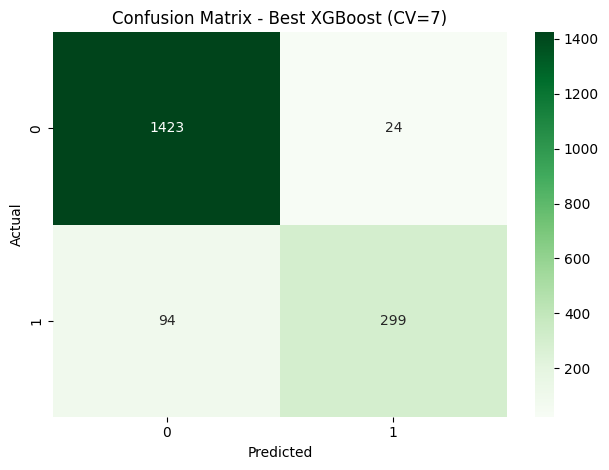

In [115]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with best parameters from CV=7
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    eval_metric='logloss',
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=300,
    subsample=0.8,
    use_label_encoder=False,
    random_state=42
)

best_xgb.fit(X_train_scaled, y_train)
y_pred = best_xgb.predict(X_test_scaled)

# Results
print("Final XGBoost Evaluation (CV=7):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Best XGBoost (CV=7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

We search for the best parameters for the Logistic Regression model.

In [ ]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid for Logistic Regression
param_grid = {
    'penalty': ['l2'],            
    'C': [0.001, 0.01, 0.1, 1, 10],       
    'solver': ['lbfgs', 'liblinear'],     
    'max_iter': [500, 1000]
}

cv_results = []

# CV loop
for cv_val in range(2, 11):
    print(f"\n>> Running GridSearchCV for Logistic Regression with cv={cv_val}")

    model = LogisticRegression(random_state=42)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv_val,
        scoring='f1',
        verbose=0,
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"CV={cv_val} → Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")
    print(f"Best Params: {grid_search.best_params_}")

    cv_results.append({
        'cv': cv_val,
        'accuracy': acc,
        'f1_score': f1,
        'best_params': grid_search.best_params_
    })


cv_results_df = pd.DataFrame(cv_results).sort_values(by='f1_score', ascending=False).reset_index(drop=True)
print("\nCV Results Table for Logistic Regression (Sorted by F1 Score):")
print(cv_results_df)


>> Running GridSearchCV for Logistic Regression with cv=2
CV=2 → Accuracy: 0.8826 | F1 Score: 0.6447
Best Params: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

>> Running GridSearchCV for Logistic Regression with cv=3
CV=3 → Accuracy: 0.8826 | F1 Score: 0.6447
Best Params: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}

>> Running GridSearchCV for Logistic Regression with cv=4
CV=4 → Accuracy: 0.8826 | F1 Score: 0.6447
Best Params: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

>> Running GridSearchCV for Logistic Regression with cv=5
CV=5 → Accuracy: 0.8826 | F1 Score: 0.6447
Best Params: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

>> Running GridSearchCV for Logistic Regression with cv=6
CV=6 → Accuracy: 0.8826 | F1 Score: 0.6447
Best Params: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}

>> Running GridSearchCV for Logistic Regression with cv=7
CV=7 → Accuracy: 0.8826 | F1 Score: 0.6447
B

We retrain Logistic Regression with the best parameters and check the results.

Final Logistic Regression Evaluation:
Accuracy: 0.8826086956521739
F1 Score: 0.6447368421052632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1447
           1       0.91      0.50      0.64       393

    accuracy                           0.88      1840
   macro avg       0.90      0.74      0.79      1840
weighted avg       0.89      0.88      0.87      1840



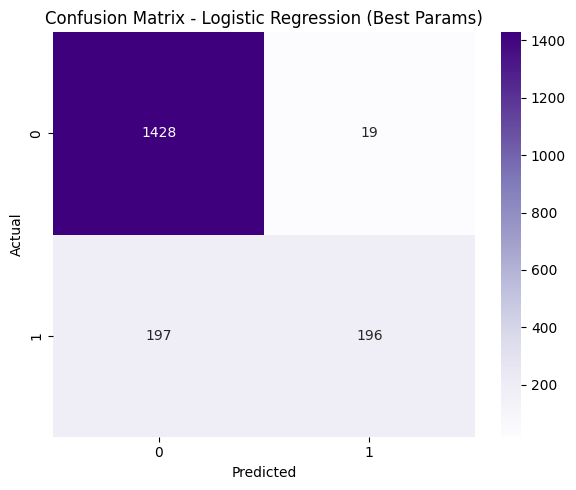

In [117]:
# Feature set and target
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with best params
best_log_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2',
    solver='lbfgs',
    random_state=42
)

best_log_model.fit(X_train_scaled, y_train)
y_pred = best_log_model.predict(X_test_scaled)

# Results
print("Final Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## 6.3 Train/Test Split

We test different train/test splits and cross-validation folds to find the best configuration for Logistic Regression.

In [118]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

# Grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],  
    'max_iter': [500]
}

# Split configuration
split_configs = {
    0.3: "70/30",
    0.25: "75/25",
    0.2: "80/20",
    0.1: "90/10"
}

best_results_per_split = []

for test_size, label in split_configs.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_f1 = -1
    best_result = {}

    for cv_val in range(2, 11):
        logreg = LogisticRegression()
        grid_search = GridSearchCV(
            estimator=logreg,
            param_grid=param_grid,
            cv=cv_val,
            scoring='f1',
            verbose=0,
            n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train)

        y_pred = grid_search.best_estimator_.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_result = {
                'split': label,
                'test_size': test_size,
                'cv': cv_val,
                'accuracy': acc,
                'f1_score': f1,
                'best_params': grid_search.best_params_
            }

    best_results_per_split.append(best_result)


summary_df = pd.DataFrame(best_results_per_split).sort_values(by='f1_score', ascending=False).reset_index(drop=True)

print("Best Results by Train/Test Split (Logistic Regression):")
print(summary_df)


Best Results by Train/Test Split (Logistic Regression):
   split  test_size  cv  accuracy  f1_score  \
0  90/10       0.10   2  0.885870  0.651163   
1  80/20       0.20   2  0.882609  0.644737   
2  75/25       0.25   2  0.878696  0.632411   
3  70/30       0.30   2  0.880435  0.631696   

                                         best_params  
0  {'C': 10, 'max_iter': 500, 'penalty': 'l2', 's...  
1  {'C': 10, 'max_iter': 500, 'penalty': 'l2', 's...  
2  {'C': 10, 'max_iter': 500, 'penalty': 'l2', 's...  
3  {'C': 10, 'max_iter': 500, 'penalty': 'l2', 's...  


We test different train/test splits and cross-validation folds to find the best configuration for Random Forest.

In [119]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Split configuration
split_configs = {
    0.3: "70/30",
    0.25: "75/25",
    0.2: "80/20",
    0.1: "90/10"
}

best_results_per_split = []

for test_size, label in split_configs.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_f1 = -1
    best_result = {}

    for cv_val in range(2, 11):
        rf = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(
            estimator=rf,
            param_grid=param_grid,
            cv=cv_val,
            scoring='f1',
            verbose=0,
            n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train)

        y_pred = grid_search.best_estimator_.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_result = {
                'split': label,
                'test_size': test_size,
                'cv': cv_val,
                'accuracy': acc,
                'f1_score': f1,
                'best_params': grid_search.best_params_
            }

    best_results_per_split.append(best_result)


summary_df = pd.DataFrame(best_results_per_split).sort_values(by='f1_score', ascending=False).reset_index(drop=True)

print("Best Results by Train/Test Split (Random Forest):")
print(summary_df)

Best Results by Train/Test Split (Random Forest):
   split  test_size  cv  accuracy  f1_score  \
0  80/20       0.20   3  0.935870  0.836111   
1  70/30       0.30   8  0.932971  0.830119   
2  75/25       0.25   8  0.932609  0.827969   
3  90/10       0.10   3  0.932609  0.827778   

                                         best_params  
0  {'bootstrap': True, 'max_depth': 20, 'max_feat...  
1  {'bootstrap': True, 'max_depth': 20, 'max_feat...  
2  {'bootstrap': True, 'max_depth': 10, 'max_feat...  
3  {'bootstrap': True, 'max_depth': 20, 'max_feat...  


We test different train/test splits and cross-validation folds to find the best configuration for XGBoost.

In [120]:
# Prepare data
X = df[engineered_columns].fillna(0)
y = df['DepDel15'].astype(int)

# Grid for XGBoost
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Split configuration
split_configs = {
    0.3: "70/30",
    0.25: "75/25",
    0.2: "80/20",
    0.1: "90/10"
}

best_results_per_split = []

for test_size, label in split_configs.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_f1 = -1
    best_result = {}

    for cv_val in range(2, 11):
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        grid_search = GridSearchCV(
            estimator=xgb,
            param_grid=param_grid,
            cv=cv_val,
            scoring='f1',
            verbose=0,
            n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train)

        y_pred = grid_search.best_estimator_.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_result = {
                'split': label,
                'test_size': test_size,
                'cv': cv_val,
                'accuracy': acc,
                'f1_score': f1,
                'best_params': grid_search.best_params_
            }

    best_results_per_split.append(best_result)


summary_df = pd.DataFrame(best_results_per_split).sort_values(by='f1_score', ascending=False).reset_index(drop=True)

print("Best Results by Train/Test Split (XGBoost):")
print(summary_df)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:41:15] WARN

Best Results by Train/Test Split (XGBoost):
   split  test_size  cv  accuracy  f1_score  \
0  90/10       0.10   4  0.935870  0.838356   
1  80/20       0.20   7  0.935870  0.835196   
2  70/30       0.30   2  0.933333  0.828678   
3  75/25       0.25   2  0.932174  0.826281   

                                         best_params  
0  {'colsample_bytree': 0.8, 'learning_rate': 0.1...  
1  {'colsample_bytree': 0.8, 'learning_rate': 0.1...  
2  {'colsample_bytree': 0.8, 'learning_rate': 0.1...  
3  {'colsample_bytree': 1, 'learning_rate': 0.1, ...  


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:43:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
